<a href="https://colab.research.google.com/github/theaveas/DeepLearning/blob/main/DLwithPython/chp02_dlwithpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Mathematical building blocks of Neural Network
This notebook is a summary / self-notes for Chapter 2 [Deep Learning With Python - by Francois Chollet, Second Edition](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_3?crid=G0ITEJNSAY1K&keywords=deep+learning+with+python+2nd+edition&qid=1644115977&s=books&sprefix=deep+learning+with+pyt%2Cstripbooks%2C518&sr=1-3).\
This notebook code concept and diagrams are borrowed from the book and reproduced by me

## A first look at a neural network
#### Loading the mnist dataset in [Keras](https://keras.io/)

In [19]:
# import libraries
from tensorflow.keras.datasets import mnist

# load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Train set, and Test set

In [6]:
# inspect training set "shape"
print(X_train.shape)

# length of training set
print(len(X_train))

(60000, 28, 28)
60000


In [8]:
# inspect test set "shape"
print(y_test.shape)

# length of test set
print(len(y_test))

(10000,)
10000


#### Network architecture

In [9]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# building network layers
nn = keras.Sequential([
                       layers.Dense(512, activation='relu'),
                       layers.Dense(10, activation='softmax')
])

#### Compile

In [11]:
nn.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### Preparing the image data

In [38]:
X_train = X_train.reshape((60000, 28*28)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

#### Fitting the model

In [17]:
nn.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2560 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9889


#### Using the model to make predictions

In [49]:
# predict the first ten digits of test set
test_digits = X_test[0:10]
predictions = nn.predict(test_digits)
print(f'Probabilitiy distribution: \n{predictions[1]}')

print(f'Highest distribution: {predictions[1].argmax()}')

Probabilitiy distribution: 
[2.2031511e-10 2.8716170e-07 9.9999964e-01 6.6101130e-08 7.1280955e-19
 3.1333898e-09 1.0767824e-09 2.1487113e-17 6.2452448e-09 4.1418579e-18]
Highest distribution: 2


2
1.1817301e-10


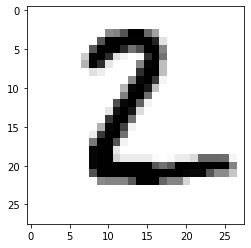

image label: 2


In [35]:
# displaying the digit
# import library
from matplotlib import pyplot as plt

# reloading the mnist dataset in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digit = X_test[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print('image label:', y_test[1])

#### Evaluating the model on new data

In [18]:
loss, accuracy = nn.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9804
Test accuracy: 0.980400025844574
